In [0]:
import os
os.chdir('/content/tybalt')
!pwd

/content/tybalt


In [0]:
import pandas as pd

In [0]:
!ls results

adage_gene_weights.tsv
adage_tsne_features.tsv
feature_comparison
hgsc_mesenchymal_immunoreactive_algorithm_subtract.tsv
hgsc_node38genes_neg.tsv
hgsc_node38genes_pos.tsv
hgsc_node56genes_neg.tsv
hgsc_node56genes_pos.tsv
hgsc_node77genes_neg.tsv
hgsc_node77genes_pos.tsv
hgsc_node79genes_neg.tsv
hgsc_node79genes_pos.tsv
hgsc_node87genes_neg.tsv
hgsc_node87genes_pos.tsv
high_weight_genes_node53_skcm.tsv
high_weight_genes_node66_skcm.tsv
parameter_sweep_adage_results.tsv
parameter_sweep_full_results.tsv
parameter_sweep_twohidden300_full_results.tsv
parameter_sweep_twohidden_full_results.tsv
pathway
rnaseq_tsne_features.tsv
tybalt_gene_weights.tsv
tybalt_tsne_features_36dim.tsv
tybalt_tsne_features.tsv


In [0]:
tsne36 = 'results/tybalt_tsne_features_36dim.tsv'
tsne_df = pd.read_table(tsne36)
print(tsne_df.shape)
tsne_df.head(2)

(10459, 3)


,tcga_id,1,2
0,TCGA-02-0047-01,20.982117,-10.639854
1,TCGA-02-0055-01,16.597500,-11.452167


In [0]:
clinical = 'data/clinical_data.tsv'
clinical_df = pd.read_table(clinical)
print(clinical_df.shape)
clinical_df.head(2)

(11284, 17)


,sample_id,platform,analysis_center,gender,race,ethnicity,organ,acronym,disease,vital_status,sample_type,age_at_diagnosis,portion_id,percent_tumor_nuclei,drug,year_of_diagnosis,stage
0,TCGA-CD-8534,Illumina HiSeq,BCGSC,male,asian,not hispanic or latino,Stomach,STAD,Stomach adenocarcinoma,alive,Primary Tumor,41.0,TCGA-CD-8534-01A-11,85.0,NaN,2011,Stage II
1,TCGA-ER-A19A,Illumina HiSeq,UNC,male,white,not hispanic or latino,Skin,SKCM,Skin Cutaneous Melanoma,alive,Metastatic,79.0,TCGA-ER-A19A-06A-21,85.0,NaN,2006,Stage IV


In [0]:
tsne_patients = tsne_df.tcga_id.values
print(len(tsne_patients))

10459


In [0]:
all_patients = clinical_df.sample_id.values
print(len(all_patients))

11284


In [0]:
len([a for a in tsne_patients if a in all_patients])

0

In [0]:
tsne_patients[:5], all_patients[:5]

(array(['TCGA-02-0047-01', 'TCGA-02-0055-01', 'TCGA-02-2483-01',
        'TCGA-02-2485-01', 'TCGA-02-2486-01'], dtype=object),
 array(['TCGA-CD-8534', 'TCGA-ER-A19A', 'TCGA-C5-A1M8', 'TCGA-D1-A0ZN',
        'TCGA-EM-A4FF'], dtype=object))

In [0]:
len([a for a in tsne_patients if a[:12] in all_patients])

10375

In [0]:
tsne_df['sample_id']=tsne_df['tcga_id'].apply(lambda s:s[:12])
tsne_df.head(3)

,tcga_id,1,2,sample_id
0,TCGA-02-0047-01,20.982117,-10.639854,TCGA-02-0047
1,TCGA-02-0055-01,16.597500,-11.452167,TCGA-02-0055
2,TCGA-02-2483-01,21.278357,-13.642405,TCGA-02-2483


## Plot using acronym as legends

In [0]:
tumors_df = clinical_df[['sample_id', 'acronym']]
tumors_df.columns=['sample_id', 'tumor_type']
tumors_df.head()

,sample_id,tumor_type
0,TCGA-CD-8534,STAD
1,TCGA-ER-A19A,SKCM
2,TCGA-C5-A1M8,CESC
3,TCGA-D1-A0ZN,UCEC
4,TCGA-EM-A4FF,THCA


In [0]:
merged=pd.merge(tsne_df, tumors_df, how='inner')
merged = merged.drop('tcga_id', axis=1)
merged.head(2)

,1,2,sample_id,tumor_type
0,20.982117,-10.639854,TCGA-02-0047,GBM
1,16.597500,-11.452167,TCGA-02-0055,GBM
2,21.278357,-13.642405,TCGA-02-2483,GBM
3,18.620565,-9.220140,TCGA-02-2485,GBM
4,15.943850,-9.104888,TCGA-02-2486,GBM
5,-3.584177,-28.359920,TCGA-04-1348,OV
6,-3.182038,-30.554724,TCGA-04-1357,OV
7,0.216966,-27.513153,TCGA-04-1362,OV
8,2.186925,-25.893580,TCGA-04-1364,OV
9,-2.700377,-27.318820,TCGA-04-1365,OV


In [0]:
merged.shape

(12091, 5)

In [0]:
label_to_id_dict = {v:i for i,v in enumerate(merged.tumor_type.unique())}
label_to_id_dict

{'ACC': 30,
 'BLCA': 6,
 'BRCA': 14,
 'CESC': 12,
 'CHOL': 20,
 'COAD': 17,
 'DLBC': 27,
 'ESCA': 8,
 'GBM': 0,
 'HNSC': 23,
 'KICH': 28,
 'KIRC': 21,
 'KIRP': 10,
 'LAML': 24,
 'LGG': 26,
 'LIHC': 11,
 'LUAD': 2,
 'LUSC': 3,
 'MESO': 16,
 'OV': 1,
 'PAAD': 9,
 'PCPG': 31,
 'PRAD': 4,
 'READ': 25,
 'SARC': 13,
 'SKCM': 19,
 'STAD': 18,
 'TGCT': 7,
 'THCA': 22,
 'THYM': 15,
 'UCEC': 5,
 'UCS': 29,
 'UVM': 32}

In [0]:
id_to_label_dict = {v:k for k,v in label_to_id_dict.items()}
id_to_label_dict

{0: 'GBM',
 1: 'OV',
 2: 'LUAD',
 3: 'LUSC',
 4: 'PRAD',
 5: 'UCEC',
 6: 'BLCA',
 7: 'TGCT',
 8: 'ESCA',
 9: 'PAAD',
 10: 'KIRP',
 11: 'LIHC',
 12: 'CESC',
 13: 'SARC',
 14: 'BRCA',
 15: 'THYM',
 16: 'MESO',
 17: 'COAD',
 18: 'STAD',
 19: 'SKCM',
 20: 'CHOL',
 21: 'KIRC',
 22: 'THCA',
 23: 'HNSC',
 24: 'LAML',
 25: 'READ',
 26: 'LGG',
 27: 'DLBC',
 28: 'KICH',
 29: 'UCS',
 30: 'ACC',
 31: 'PCPG',
 32: 'UVM'}

In [0]:
data_2d = merged[['1','2']].values
label_ids = merged.tumor_type.apply(lambda v:label_to_id_dict[v])

In [0]:
def visualize_scatter(data_2d, label_ids, figsize=(15,15)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    plt.legend(loc='best')

In [0]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import numpy as np
from glob import glob
import matplotlib.cm as cm


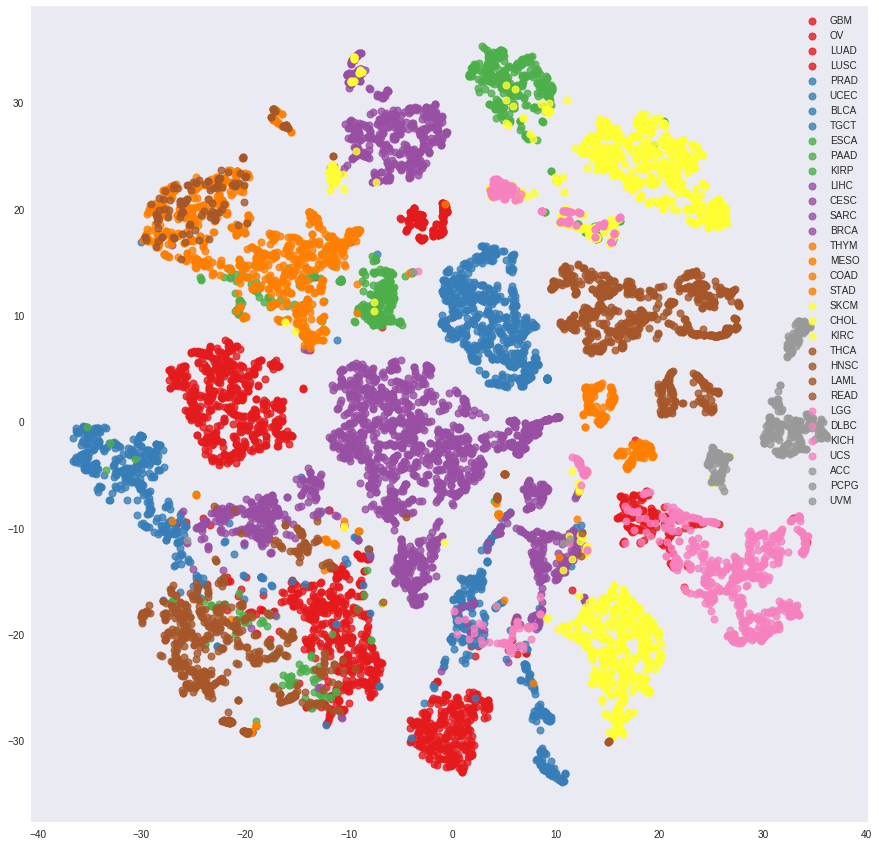

In [0]:
visualize_scatter(data_2d, label_ids)

In [0]:
subset = merged.sample(frac=0.2)
data_2d = subset[['1','2']].values
label_ids = subset.tumor_type.apply(lambda v:label_to_id_dict[v])


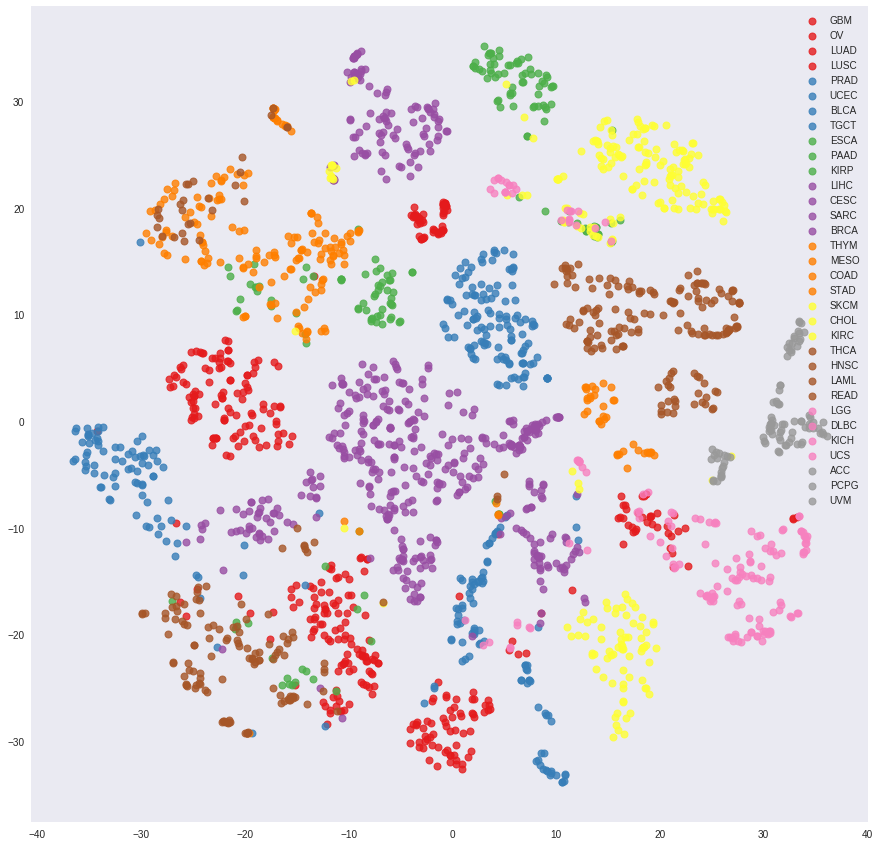

In [0]:
visualize_scatter(data_2d, label_ids)

In [0]:
tumors_df = clinical_df[['sample_id', 'organ']]
tumors_df.head()

,sample_id,organ
0,TCGA-CD-8534,Stomach
1,TCGA-ER-A19A,Skin
2,TCGA-C5-A1M8,Cervix
3,TCGA-D1-A0ZN,Uterus
4,TCGA-EM-A4FF,Thyroid


In [0]:
merged=pd.merge(tsne_df, tumors_df, how='inner')
merged = merged.drop('tcga_id', axis=1)
merged.head()

,1,2,sample_id,organ
0,20.982117,-10.639854,TCGA-02-0047,Brain
1,16.597500,-11.452167,TCGA-02-0055,Brain
2,21.278357,-13.642405,TCGA-02-2483,Brain
3,18.620565,-9.220140,TCGA-02-2485,Brain
4,15.943850,-9.104888,TCGA-02-2486,Brain


In [0]:
organ_label_to_id_dict = {v:i for i,v in enumerate(merged.organ.unique())}
organ_label_to_id_dict

{'Adrenal Gland': 24,
 'Bile Duct': 19,
 'Bladder': 5,
 'Bone Marrow': 22,
 'Brain': 0,
 'Breast': 13,
 'Cervix': 11,
 'Colorectal': 16,
 'Esophagus': 7,
 'Eye': 25,
 'Head and Neck': 21,
 'Kidney': 9,
 'Liver': 10,
 'Lung': 2,
 'Lymph Nodes': 23,
 'Ovary': 1,
 'Pancreas': 8,
 'Pleura': 15,
 'Prostate': 3,
 'Skin': 18,
 'Soft Tissue': 12,
 'Stomach': 17,
 'Testis': 6,
 'Thymus': 14,
 'Thyroid': 20,
 'Uterus': 4}

In [0]:
id_to_label_dict = {v:k for k,v in organ_label_to_id_dict.items()}
id_to_label_dict

{0: 'Brain',
 1: 'Ovary',
 2: 'Lung',
 3: 'Prostate',
 4: 'Uterus',
 5: 'Bladder',
 6: 'Testis',
 7: 'Esophagus',
 8: 'Pancreas',
 9: 'Kidney',
 10: 'Liver',
 11: 'Cervix',
 12: 'Soft Tissue',
 13: 'Breast',
 14: 'Thymus',
 15: 'Pleura',
 16: 'Colorectal',
 17: 'Stomach',
 18: 'Skin',
 19: 'Bile Duct',
 20: 'Thyroid',
 21: 'Head and Neck',
 22: 'Bone Marrow',
 23: 'Lymph Nodes',
 24: 'Adrenal Gland',
 25: 'Eye'}

In [0]:
data_2d = merged[['1','2']].values
label_ids = merged.organ.apply(lambda v:organ_label_to_id_dict[v])

In [0]:
merged.organ

0            Brain
1            Brain
2            Brain
3            Brain
4            Brain
5            Ovary
6            Ovary
7            Ovary
8            Ovary
9            Ovary
10           Ovary
11           Ovary
12            Lung
13            Lung
14            Lung
15            Lung
16            Lung
17            Lung
18            Lung
19            Lung
20            Lung
21            Lung
22            Lung
23            Lung
24            Lung
25            Lung
26            Lung
27            Lung
28            Lung
29            Lung
           ...    
12061       Testis
12062       Pleura
12063       Pleura
12064       Pleura
12065       Pleura
12066       Pleura
12067       Pleura
12068       Pleura
12069        Liver
12070        Liver
12071        Liver
12072        Liver
12073        Liver
12074        Liver
12075        Liver
12076      Stomach
12077    Esophagus
12078        Liver
12079        Liver
12080        Liver
12081        Liver
12082       

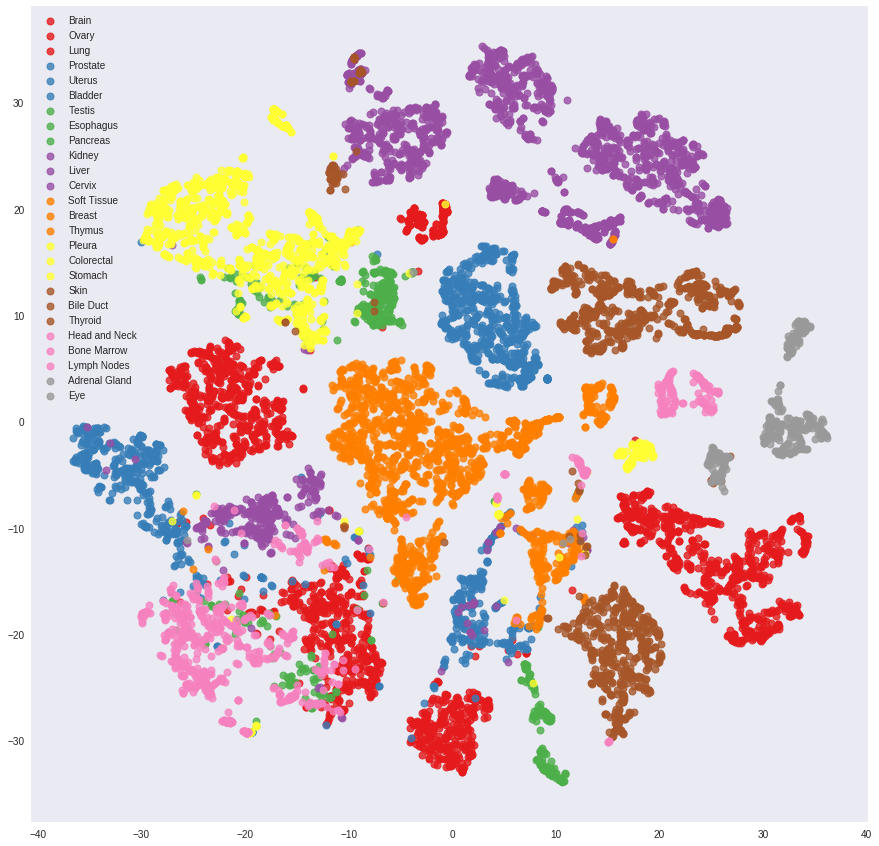

In [0]:
visualize_scatter(data_2d, label_ids)

In [0]:
acronym_organ = clinical_df[['acronym', 'organ']]

acronym_organ.head()

,acronym,organ
0,STAD,Stomach
1,SKCM,Skin
2,CESC,Cervix
3,UCEC,Uterus
4,THCA,Thyroid


In [0]:
acronym_organ = acronym_organ.drop_duplicates()
acronym_organ = acronym_organ.reset_index(drop=True)
acronym_organ = acronym_organ.sort_values(by='acronym')
acronym_organ

,acronym,organ
30,ACC,Adrenal Gland
25,BLCA,Bladder
7,BRCA,Breast
2,CESC,Cervix
31,CHOL,Bile Duct
13,COAD,Colorectal
26,DLBC,Lymph Nodes
10,ESCA,Esophagus
20,GBM,Brain
19,HNSC,Head and Neck


In [0]:
from google.colab import files
acronym_organ.to_csv('disease_names.csv', index=False)
files.download('disease_names.csv')